In [1]:
!pip install mysql-connector
!pip install --upgrade mysql-connector-python

In [5]:
import mysql.connector
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
#database connection
db = mysql.connector.connect(
    host="localhost",
    user="root",
    password="Hemalatha@12",
    database="electronics_business", 
    auth_plugin="mysql_native_password"
)
mycursor = db.cursor()
print(db)


In [9]:
#fetching data
mycursor.execute("select * from phones")

output = mycursor.fetchall()

for x in output:
    print(x)

(1, 'Galaxy S21', 'S21', 'android', 'Exynos 2100', Decimal('8.0'), Decimal('128.0'), Decimal('6.20'), Decimal('10.0'), Decimal('12.0'), 'South Korea', 'Phantom Gray', '4000', '25', Decimal('69999.00'), 4)
(2, 'iPhone 13', '13', 'ios', 'A15 Bionic', Decimal('6.0'), Decimal('128.0'), Decimal('6.10'), Decimal('12.0'), Decimal('12.0'), 'USA', 'Midnight', '3240', None, Decimal('79999.00'), 4)
(3, 'OnePlus 9', '9', 'android', None, Decimal('8.0'), Decimal('12.0'), Decimal('6.55'), Decimal('16.0'), Decimal('4.0'), 'China', 'Arctic Sky', '4500', '65', Decimal('49999.00'), 2)
(4, 'Xiaomi Redmi Note 10', 'Note 10', 'android', 'Snapdragon 678', Decimal('4.0'), Decimal('64.0'), Decimal('6.43'), Decimal('13.0'), Decimal('48.0'), 'China', 'Frost White', '5000', '33', Decimal('14999.00'), 0)
(5, 'Samsung Galaxy A52', 'A52', 'android', 'Snapdragon 720G', Decimal('6.0'), Decimal('128.0'), Decimal('6.50'), Decimal('32.0'), Decimal('64.0'), 'South Korea', 'Awesome Black', '4500', '25', None, 1)
(6, 'Redm

In [11]:
#Loading Data into Pandas DataFrame
query = ("select * from phones")
data = pd.read_sql(query,db)

C:\Users\kayah\AppData\Local\Temp\ipykernel_22288\4264607196.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data = pd.read_sql(query,db)


In [12]:
data.head(3)

,id,phone_name,model_type,phone_type,processor_type,ram_GB,rom_GB,display_inch,primary_cam_MP,cam_back_cam_MP,manufacturing_country,color_type,battery_cap_mAh,charger_volts_W,cost,segment
0,1,Galaxy S21,S21,android,Exynos 2100,8.0,128.0,6.20,10.0,12.0,South Korea,Phantom Gray,4000,25,69999.0,4
1,2,iPhone 13,13,ios,A15 Bionic,6.0,128.0,6.10,12.0,12.0,USA,Midnight,3240,None,79999.0,4
2,3,OnePlus 9,9,android,None,8.0,12.0,6.55,16.0,4.0,China,Arctic Sky,4500,65,49999.0,2


In [15]:
data.tail(2)

,id,phone_name,model_type,phone_type,processor_type,ram_GB,rom_GB,display_inch,primary_cam_MP,cam_back_cam_MP,manufacturing_country,color_type,battery_cap_mAh,charger_volts_W,cost,segment
1026,1027,Nokia 7.2,TA-1136,android,Snapdragon 660,NaN,128.0,6.3,48.0,NaN,Finland,Cyan Green,None,18,24990.0,1
1027,1028,Sony Xperia 5 II,XQ-AS42,android,Snapdragon 865,8.0,128.0,NaN,12.0,NaN,Japan,Black,4000,None,74990.0,4


In [17]:
data.shape

(1028, 16)

In [19]:
data.size

16448

In [21]:
data.describe()

,id,ram_GB,rom_GB,display_inch,primary_cam_MP,cam_back_cam_MP,cost,segment
count,1028.000000,928.000000,960.000000,992.000000,1012.000000,960.000000,1004.000000,1028.000000
mean,514.500000,6.525862,113.350000,6.214476,19.632806,34.623750,39864.063745,1.801556
std,296.902341,8.404895,73.545531,0.602004,18.718657,25.584999,28788.638156,1.351373
min,1.000000,1.000000,8.000000,4.300000,1.200000,4.000000,6999.000000,0.000000
25%,257.750000,4.000000,64.000000,6.000000,8.000000,12.200000,17999.000000,1.000000
50%,514.500000,6.000000,128.000000,6.440000,13.000000,23.000000,29999.000000,2.000000
75%,771.250000,8.000000,128.000000,6.550000,32.000000,48.000000,49999.000000,2.000000
max,1028.000000,128.000000,512.000000,7.600000,108.000000,108.000000,149999.000000,4.000000


In [23]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1028 entries, 0 to 1027
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     1028 non-null   int64  
 1   phone_name             952 non-null    object 
 2   model_type             960 non-null    object 
 3   phone_type             964 non-null    object 
 4   processor_type         952 non-null    object 
 5   ram_GB                 928 non-null    float64
 6   rom_GB                 960 non-null    float64
 7   display_inch           992 non-null    float64
 8   primary_cam_MP         1012 non-null   float64
 9   cam_back_cam_MP        960 non-null    float64
 10  manufacturing_country  1020 non-null   object 
 11  color_type             964 non-null    object 
 12  battery_cap_mAh        940 non-null    object 
 13  charger_volts_W        916 non-null    object 
 14  cost                   1004 non-null   float64
 15  segm

In [25]:
data.isnull().sum()

id                         0
phone_name                76
model_type                68
phone_type                64
processor_type            76
ram_GB                   100
rom_GB                    68
display_inch              36
primary_cam_MP            16
cam_back_cam_MP           68
manufacturing_country      8
color_type                64
battery_cap_mAh           88
charger_volts_W          112
cost                      24
segment                    0
dtype: int64

In [27]:
data.columns

Index(['id', 'phone_name', 'model_type', 'phone_type', 'processor_type',
       'ram_GB', 'rom_GB', 'display_inch', 'primary_cam_MP', 'cam_back_cam_MP',
       'manufacturing_country', 'color_type', 'battery_cap_mAh',
       'charger_volts_W', 'cost', 'segment'],
      dtype='object')

In [29]:
# Fill in missing values for categorical columns
data['phone_name'].fillna('Unknown', inplace=True)
data['model_type'].fillna('Unknown', inplace=True)
data['phone_type'].fillna(data['phone_type'].mode()[0], inplace=True)
data['processor_type'].fillna(data['processor_type'].mode()[0], inplace=True)
data['manufacturing_country'].fillna('Unknown', inplace=True)
data['charger_volts_W'].fillna('Unknown', inplace=True)

# Fill missing values for numeric columns
data['ram_GB'].fillna(4, inplace=True)
data['rom_GB'].fillna(data['rom_GB'].mean(), inplace=True)
data['color_type'].fillna(data['color_type'].mode()[0], inplace=True)
data['battery_cap_mAh'].fillna(3000, inplace=True) 
data['display_inch'].fillna(data['display_inch'].mean(), inplace=True)
data['primary_cam_MP'].fillna(data['primary_cam_MP'].median(), inplace=True)
data['cam_back_cam_MP'].fillna(data['cam_back_cam_MP'].median(), inplace=True)
data['cost'].fillna(data['cost'].mean(), inplace=True)  

print(data.isnull().sum())

id                       0
phone_name               0
model_type               0
phone_type               0
processor_type           0
ram_GB                   0
rom_GB                   0
display_inch             0
primary_cam_MP           0
cam_back_cam_MP          0
manufacturing_country    0
color_type               0
battery_cap_mAh          0
charger_volts_W          0
cost                     0
segment                  0
dtype: int64


C:\Users\kayah\AppData\Local\Temp\ipykernel_22288\1398463495.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  data['phone_name'].fillna('Unknown', inplace=True)
C:\Users\kayah\AppData\Local\Temp\ipykernel_22288\1398463495.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For e

In [31]:
#1 The average battery capacity of phones
# Convert the 'battery_cap_mAh' column to numeric, forcing non-numeric values to NaN
data['battery_cap_mAh'] = pd.to_numeric(data['battery_cap_mAh'], errors='coerce') #to convert the data in a column to a numeric type
                                                                 #used to handle non-numeric values in your dataset by converting them to NaN
# Verify that the column is now numeric
print(data['battery_cap_mAh'].dtypes)  

# Calculate the average battery capacity
average_battery_capacity = data['battery_cap_mAh'].mean()

# Print the result using f-string
print(f"The average battery capacity of phones is {average_battery_capacity:.2f} mAh")



float64
The average battery capacity of phones is 4022.60 mAh


0


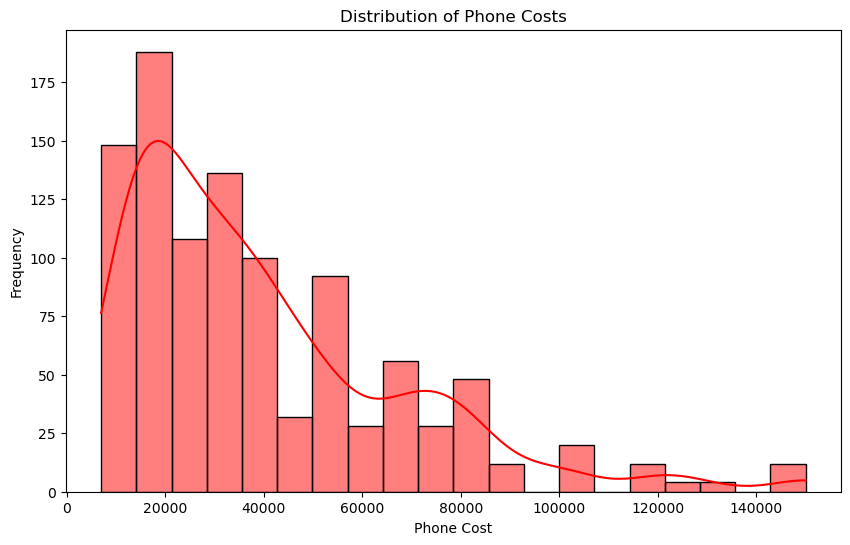

In [33]:
#2 Distribution of phone costs
print(data['cost'].isnull().sum())
plt.figure(figsize=(10, 6))
sns.histplot(data['cost'], bins=20, kde=True, color='red') #which draws a smooth curve to represent the data distribution
plt.title('Distribution of Phone Costs')
plt.xlabel('Phone Cost')
plt.ylabel('Frequency')
plt.show()

In [35]:
#3 different phone types in the dataset
# Count the number of unique phone types in the dataset
phone_types = data['phone_type'].nunique()

# Print the result
print(f"There are {phone_types} different phone types in the dataset.")

phone_types_list = data['phone_type'].unique()
print("The different phone types are:", phone_types_list)


There are 3 different phone types in the dataset.
The different phone types are: ['android' 'ios' 'windows']


In [37]:
#4 Which model type has the highest average battery capacity
# Ensure battery_cap_mAh is numeric (in case it contains non-numeric values)
data['battery_cap_mAh'] = pd.to_numeric(data['battery_cap_mAh'], errors='coerce')

# Group by model_type and calculate the mean battery capacity for each model
avg_battery_model = data.groupby('model_type')['battery_cap_mAh'].mean()

# Find the model type with the highest average battery capacity
model_max_battery = avg_battery_model.idxmax()  # Get the model type with highest avg battery
max_battery_value = avg_battery_model.max()  # Get the highest average battery capacity

print(f"The model type with the highest average battery capacity is '{model_max_battery}' with an average of {max_battery_value} mAh.")


The model type with the highest average battery capacity is 'SM-E625F' with an average of 7000.0 mAh.


C:\Users\kayah\AppData\Local\Temp\ipykernel_22288\3640739351.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='segment', y='primary_cam_MP', data=avg_camera_segment, palette='coolwarm')


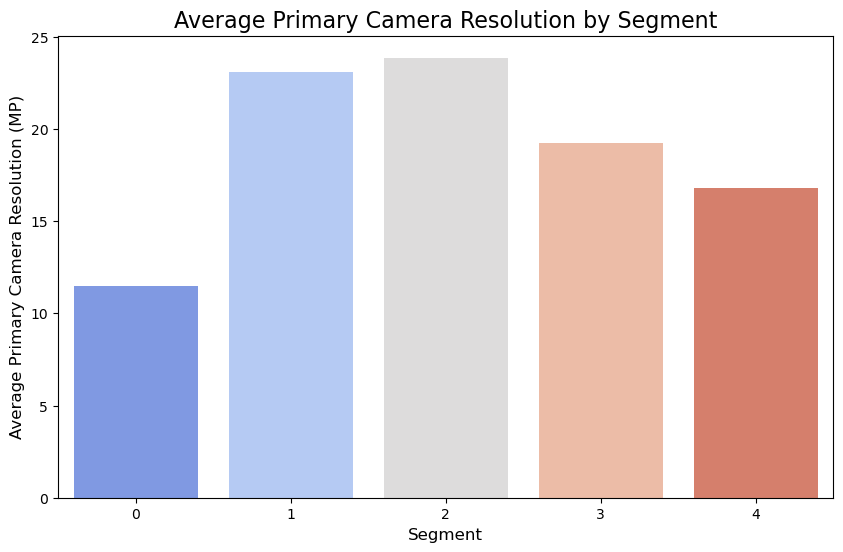

In [39]:
#5 Compare the average primary camera resolution across different segments.
data['primary_cam_MP'] = pd.to_numeric(data['primary_cam_MP'], errors='coerce')

# Group by segment and calculate the mean primary camera resolution for each segment
avg_camera_segment = data.groupby('segment')['primary_cam_MP'].mean().reset_index()

# Plot the results using a bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='segment', y='primary_cam_MP', data=avg_camera_segment, palette='coolwarm')
plt.title('Average Primary Camera Resolution by Segment', fontsize=16)
plt.xlabel('Segment', fontsize=12)
plt.ylabel('Average Primary Camera Resolution (MP)', fontsize=12)
plt.show()


In [41]:
#6  most common display size among the phones
data['display_inch'] = pd.to_numeric(data['display_inch'], errors='coerce')

# Find the most common display size using mode()
most_common_display_size = data['display_inch'].mode()[0]

# Print the result
print(f"The most common display size among the phones is {most_common_display_size} inches.")


The most common display size among the phones is 6.5 inches.


C:\Users\kayah\AppData\Local\Temp\ipykernel_22288\885268160.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='manufacturing_country', y='cost', data=data, palette='coolwarm')


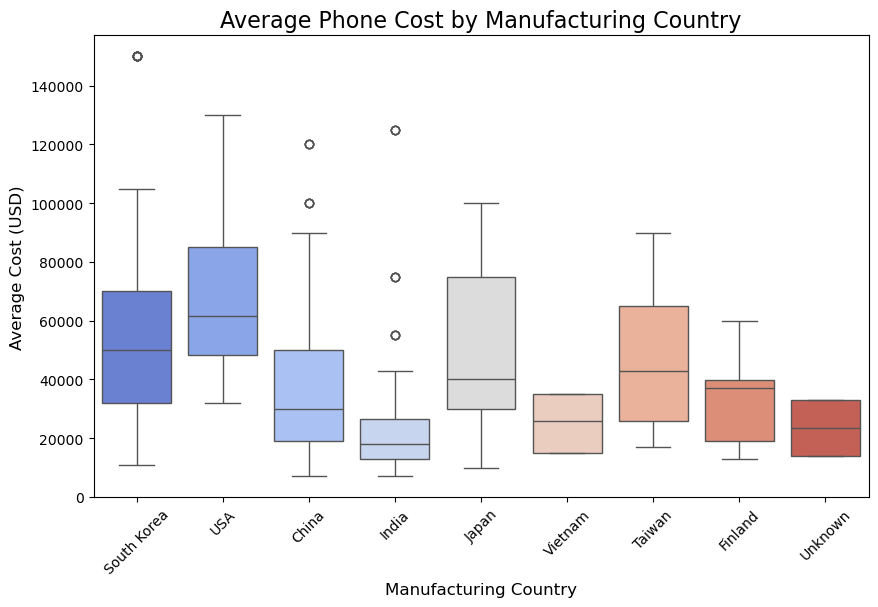

In [43]:
#7 average cost of phones by manufacturing country 
data['cost'] = pd.to_numeric(data['cost'], errors='coerce')

avg_cost_country = data.groupby('manufacturing_country')['cost'].mean().reset_index()

#Plot the results using a bar plot
plt.figure(figsize=(10, 6))
sns.boxplot(x='manufacturing_country', y='cost', data=data, palette='coolwarm')
plt.title('Average Phone Cost by Manufacturing Country', fontsize=16)
plt.xlabel('Manufacturing Country', fontsize=12)
plt.ylabel('Average Cost (USD)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


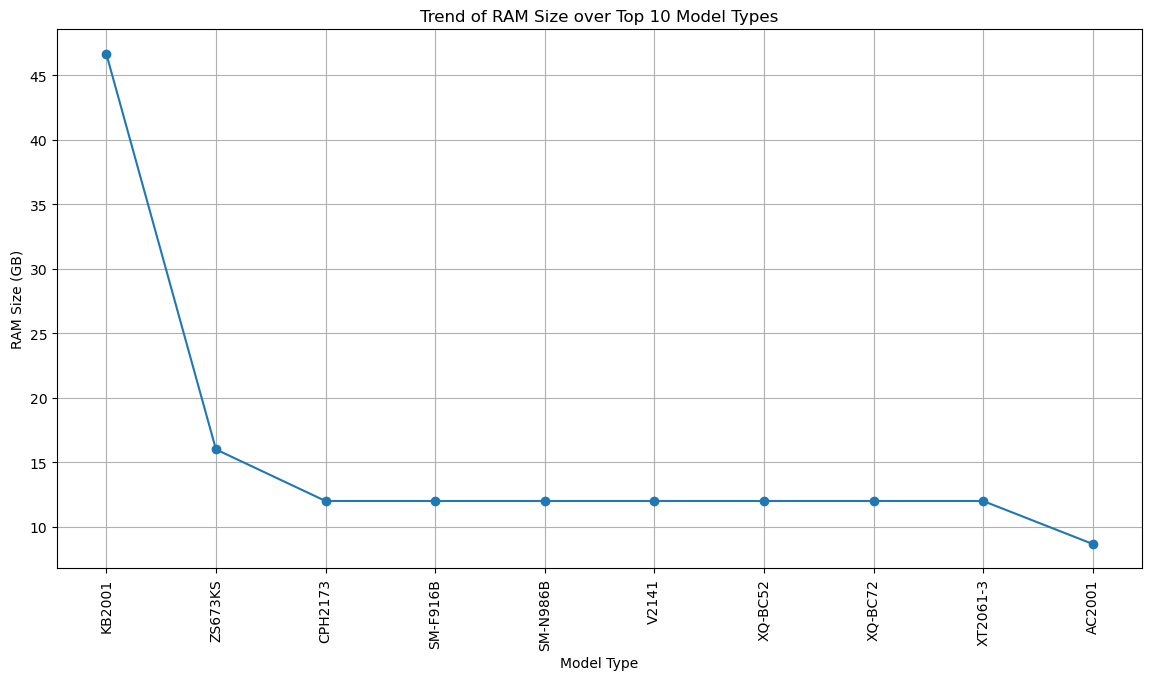

In [56]:
#8 trend of RAM size over different model types
ram_by_model = data.groupby('model_type')['ram_GB'].mean()

# Get the top 10 model types by RAM size
top_10_models = ram_by_model.nlargest(10)

plt.figure(figsize=(14, 7))
plt.plot(top_10_models.index, top_10_models, marker='o')
plt.title('Trend of RAM Size over Top 10 Model Types')
plt.xlabel('Model Type')
plt.ylabel('RAM Size (GB)')
plt.xticks(rotation=90)
plt.grid(True)
plt.show()


C:\Users\kayah\AppData\Local\Temp\ipykernel_22288\921590722.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top10_colors.index, y=top_10_colors.values, palette='viridis')


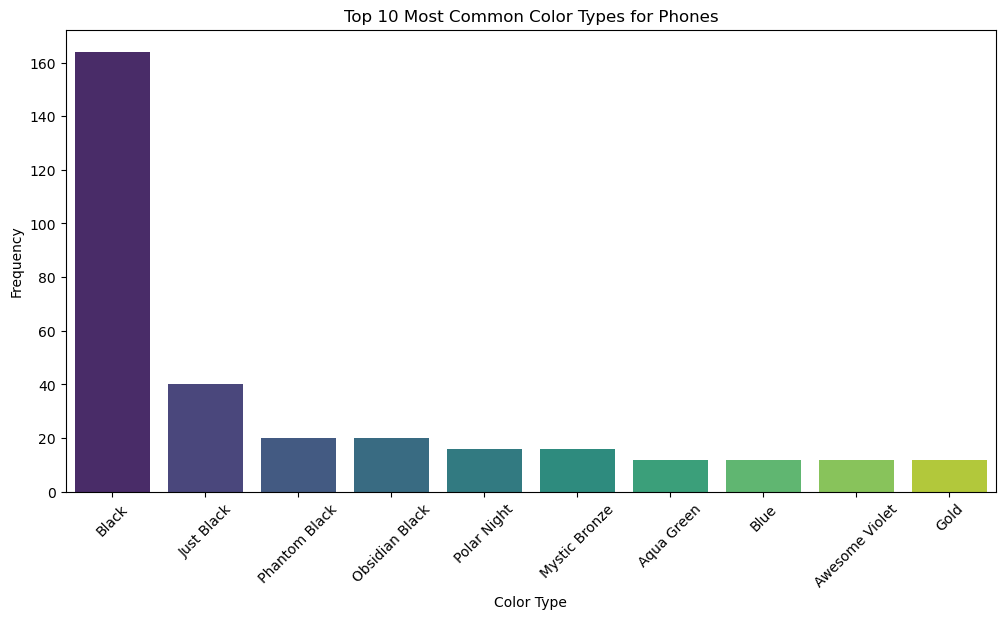

In [60]:
#9 most common color types for phones
top10_colors = data['color_type'].value_counts().nlargest(10)

plt.figure(figsize=(12, 6))
sns.barplot(x=top10_colors.index, y=top_10_colors.values, palette='viridis')

plt.title('Top 10 Most Common Color Types for Phones')
plt.xlabel('Color Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)
plt.show()


Correlation between RAM Size and ROM Size: 0.357475766272838


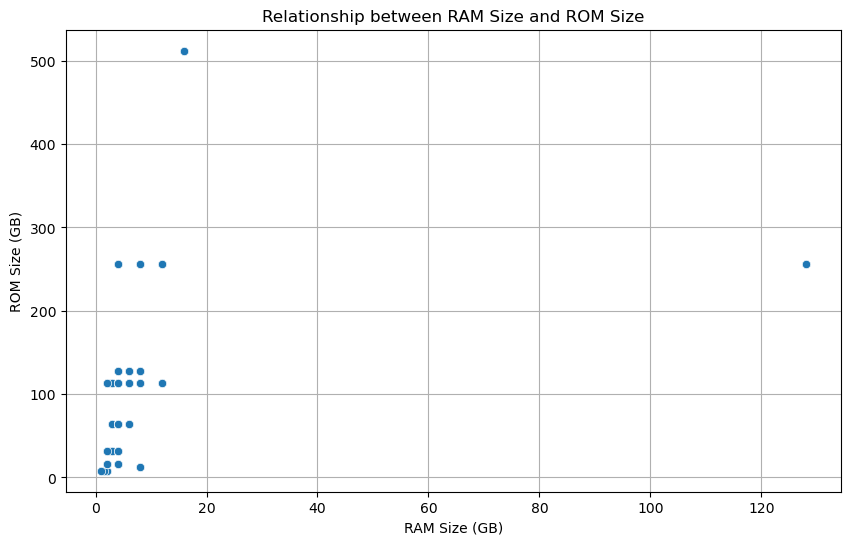

In [66]:
#10 relationship between RAM size and ROM size

correlation = data['ram_GB'].corr(data['rom_GB'])  #This value ranges from -1 to 1
print(f"Correlation between RAM Size and ROM Size: {correlation}")

plt.figure(figsize=(10, 6))
sns.scatterplot(data=data, x='ram_GB', y='rom_GB')
plt.title('Relationship between RAM Size and ROM Size')
plt.xlabel('RAM Size (GB)')
plt.ylabel('ROM Size (GB)')
plt.grid(True)
plt.show()
